In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
filepath = '/home/derek/Thinkful/Data/yelp_labelled.txt'

yelp_df = pd.read_table(filepath, sep='\t', names=('Comment', 'Sentiment'),
                   dtype={'Comment': np.str, 'Sentiment': np.int64})

In [3]:
yelp_df.head()

,Comment,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Model 1- Classification using positive keywords

In [4]:
#Creating features

df2 = yelp_df.copy()

keywords = ['amazing', 'love', 'recommend', 'great']

for key in keywords:
    df2[key] = df2['Comment'].str.contains(key, case=False)

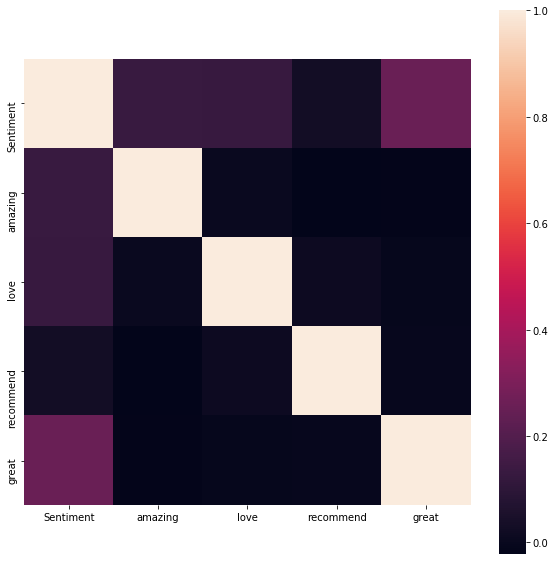

In [5]:
#Check for independence of variables

plt.figure(figsize=(10,10))
corrs = df2.corr()
sns.heatmap(corrs, square=True)
plt.show()

In [6]:
#Seperate into inputs and outputs, create model, predict

data = df2[keywords]
target = df2['Sentiment']

#Target variable is binomial, use Bernoulli Naive Bayes model

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

# Test model with holdout groups

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=20)
print('With 30% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 30% Holdout: 0.58
Testing on Sample: 0.605


# Model 2- Classification using more keywords

In [7]:
#Creating features

df2 = yelp_df.copy()

keywords = ['amazing', 'love', 'recommend', 'great', 'pleasure', 'good','excellent', 'happy','impressed', 
            'fav', 'enjoy', 'wow', '!', 'awesome', 'nice']

for key in keywords:
    df2[key] = df2['Comment'].str.contains(key, case=False)

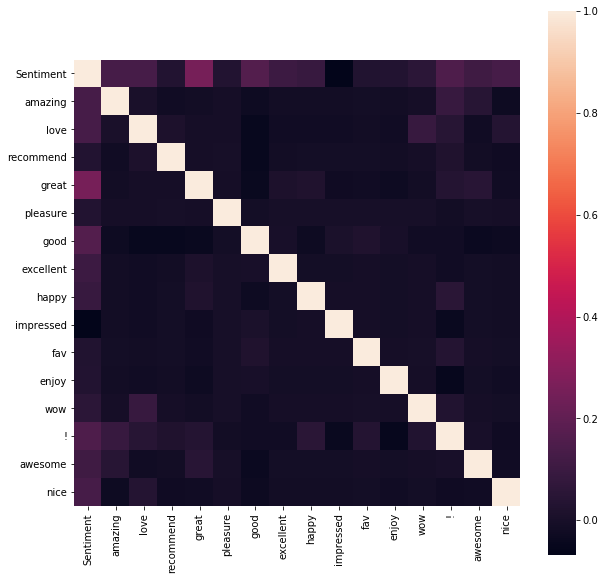

In [8]:
#Check for independence of variables

plt.figure(figsize=(10,10))
corrs = df2.corr()
sns.heatmap(corrs, square=True)
plt.show()

In [9]:
#Seperate into inputs and outputs, create model, predict

data = df2[keywords]
target = df2['Sentiment']

#Target variable is binomial, use Bernoulli Naive Bayes model

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

# Test model with holdout groups

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=20)
print('With 30% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 30% Holdout: 0.7133333333333334
Testing on Sample: 0.702


# Model 3- Classification using negative keywords

In [10]:
#Creating features

df2 = yelp_df.copy()

neg_keywords = ['nasty', 'bad', 'not', 'dis', 'waste', 'un']

for key in neg_keywords:
    df2[key] = np.invert(df2['Comment'].str.contains(key, case=False))

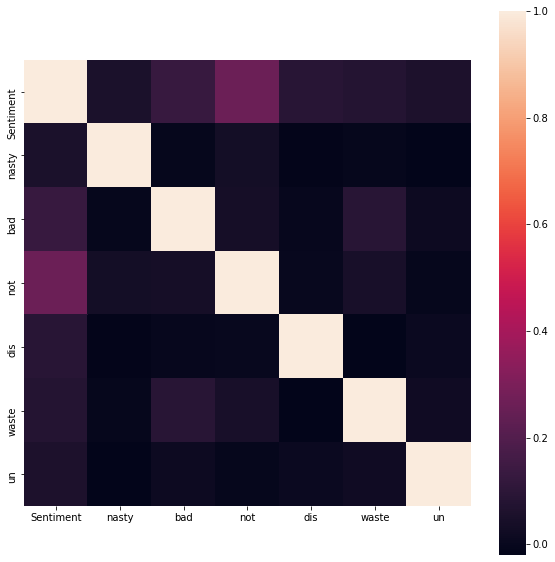

In [11]:
#Check for independence of variables

plt.figure(figsize=(10,10))
corrs = df2.corr()
sns.heatmap(corrs, square=True)
plt.show()

All negative keywords seem relatively independent of eachother

In [12]:
#Seperate into inputs and outputs, create model, predict

data = df2[neg_keywords]
target = df2['Sentiment']

#Target variable is binomial, use Bernoulli Naive Bayes model

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

# Test model with holdout groups

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=20)
print('With 30% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 30% Holdout: 0.6433333333333333
Testing on Sample: 0.64


# Model 4- Classification using positive keywords and length of comments

In [13]:
#Creating features

df2 = yelp_df.copy()

keywords = ['amazing', 'love', 'recommend', 'great', 'pleasure', 'good','excellent', 'happy','impressed', 
            'fav', 'enjoy', 'wow', '!', 'awesome', 'nice']

for key in keywords:
    df2[key] = df2['Comment'].str.contains(key, case=False)
        
#Create column of comment lengths

for i in range(len(df2['Comment'])):
    df2.loc[i,'length'] = len(df2.loc[i,'Comment'])
    
#Create columns of comment length quartiles, drop length column

df2['len_q1'] = df2.length < df2.length.quantile(0.25)
df2['len_q2'] = (df2.length > df2.length.quantile(0.25)) & (df2.length < df2.length.quantile(0.5))
df2['len_q3'] = (df2.length > df2.length.quantile(0.5)) & (df2.length < df2.length.quantile(0.75))
df2['len_q4'] = df2.length > df2.length.quantile(0.75)

df2.drop(columns='length', inplace=True)

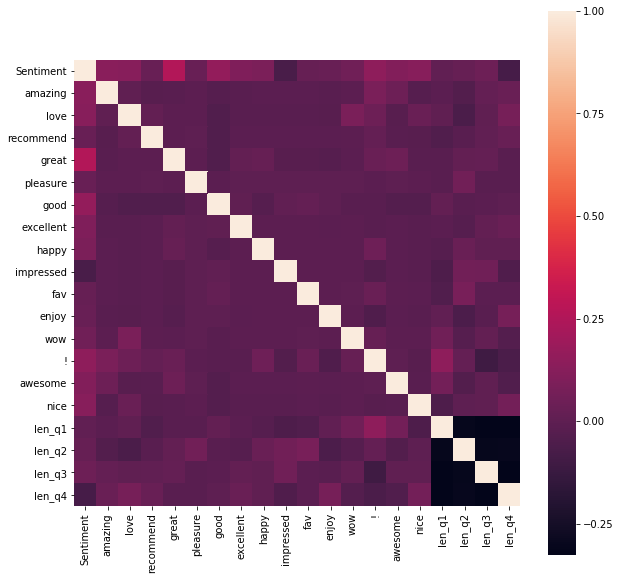

In [14]:
#Check for independence of variables

plt.figure(figsize=(10,10))
corrs = df2.corr()
sns.heatmap(corrs, square=True)
plt.show()

The length variables are not independent of one another as they are each mutually exclusive of one another.

In [15]:
#Seperate into inputs and outputs, create model, predict

data = df2[keywords + ['len_q1', 'len_q2', 'len_q3', 'len_q4']]
target = df2['Sentiment']

#Target variable is binomial, use Bernoulli Naive Bayes model

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

# Test model with holdout groups

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=20)
print('With 30% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 30% Holdout: 0.72
Testing on Sample: 0.714


# Model 5- Classification using positive and negative keywords

In [27]:
#Creating features based on positive keywords

df2 = yelp_df.copy()

keywords = ['amazing', 'love', 'recommend', 'great', 'pleasure', 'good','excellent', 'happy','impressed', 
            'fav', 'enjoy', 'wow', '!', 'awesome', 'nice']

for key in keywords:
    df2[key] = df2['Comment'].str.contains(key, case=False)

In [28]:
#Creating features based on negative keywords

neg_keywords = ['nasty', 'bad', 'not', 'dis', 'waste', 'un']

for key in neg_keywords:
    df2[key] = np.invert(df2['Comment'].str.contains(key, case=False))

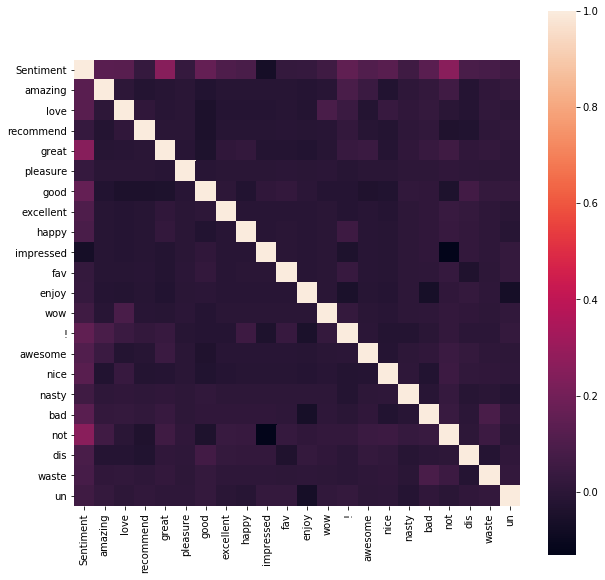

In [29]:
#Check for independence of variables

plt.figure(figsize=(10,10))
corrs = df2.corr()
sns.heatmap(corrs, square=True)
plt.show()

In [30]:
#Seperate into inputs and outputs, create model, predict

data = df2[keywords + neg_keywords]
target = df2['Sentiment']

#Target variable is binomial, use Bernoulli Naive Bayes model

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

# Test model with holdout groups

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=20)
print('With 30% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 30% Holdout: 0.7433333333333333
Testing on Sample: 0.74


# Question 1- Do any of your classifiers seem to overfit?

The model does not appear to be overfitting, even with 30% of the data removed for testing the model accuracy using the whole sample is nearly identical for all 5 classifiers.

# Question 2 -Which seem to perform the best? Why?

The positive and negative keywords together performed the best. The length features did not have have much of an effect on performance and the features violate the assumption of independence due to their mutually exclusive nature. Positive and negative keywords together performed better than either of these did seperately.

# Question 3- Which features seemed to be most impactful to performance?

The positive keywords features appear to impact performance more than any of the other features.